## 0. An end-to-end Scikit-Learn Workflow

In [1]:
# 1.Get the data ready
# Standart imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Make x (features matrix)
x = heart_disease.drop("target", axis=1)

# Make y (labels)
y = heart_disease["target"]

# target 1,0 kalp hastası mı değil mi demek. Bunu bulmaya çalışırız.

In [3]:
import warnings
warnings.filterwarnings("default")
#ignore yaz,bu kod ile görünen tüm uyarıları görmezden gelir.
#yaptığından eminsen sayfanın temiz olması için bunu kullan.
#default gelirse normale döner. uyarıları alırsın.

In [4]:
# 2.Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

#sınıflandırmanın kısaltması clf
#We'll keep the default hyperparameters
clf.get_params()
#böylece modelin hangi paramt. kullandığını görüp göremeyeceğimize bakarız.


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

bazı kısayollar;

A = Satır üstüne yeni bir satır eklenir.

B = Satır altına yeni bir satır eklenir.

C = Satırı kopyalama.

H = klavye kısayolları listesini gösterir.

Y = Markdown olan satırı Code satırına çevirir.

X = Seçili satırı keser.

DD = Seçili satır silinir.

In [5]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
#verileri eğitim ve test olarak ayırmak için

Modeli öncelikle bir eğitim seti üzerinde eğitmemiz ve bir test seti üzerinde test etmemiz gerekir.

test_size verilerin %80'inin eğitim için kullanılacağı anlamına gelir, test boyutu %20 olacaktır.
Örneğin 1000 satır olsaydı bunun 800'ü eğitim için olurdu.

clf.fit(x_train, y_train) temel olarak bir sınıflandırma modeli olan rastgele ormanın eğitim verilerindeki örüntüleri bulması anlamına gelir.

x_train üzerinde tahminleme yaptığımızda sadece o şekilde görünen dizilerde tahmnileme yapılabilir çünkü model bunu öğrenmiştir. bu yüzden [0,2,3,4]'lü bir dizi verirsen hata alırsın.

In [6]:
clf.fit(x_train, y_train);
#n estimator 100 yaparak uyarı almasını engelledik.


In [7]:
# Make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
y_preds = clf.predict(x_test)
y_preds
#y_preds geleneksel bir isim

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [8]:
y_test

57     1
174    0
94     1
299    0
155    1
      ..
203    0
263    0
281    0
153    1
179    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4.Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)
#test verileri her 4'te 3 doğru yapar

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.79        61
weighted avg       0.81      0.80      0.80        61



:.2f bir python syntax
Aşağıda 20'lik olanda en iyi sonuç alındı 

In [12]:
confusion_matrix(y_test, y_preds)

array([[18,  9],
       [ 3, 31]])

In [13]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [14]:
# 5.Improve a model

#try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"model accuracy on test set: {clf.score(x_test, y_test)*100:.2f}%")
    print(" ")

trying model with 10 estimators...
model accuracy on test set: 80.33%
 
trying model with 20 estimators...
model accuracy on test set: 80.33%
 
trying model with 30 estimators...
model accuracy on test set: 81.97%
 
trying model with 40 estimators...
model accuracy on test set: 81.97%
 
trying model with 50 estimators...
model accuracy on test set: 80.33%
 
trying model with 60 estimators...
model accuracy on test set: 81.97%
 
trying model with 70 estimators...
model accuracy on test set: 80.33%
 
trying model with 80 estimators...
model accuracy on test set: 80.33%
 
trying model with 90 estimators...
model accuracy on test set: 80.33%
 


In [15]:
# 6.Save the model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

/var/folders/71/9wmqs3m16wn4y3qcjvcr9m440000gn/T/ipykernel_4580/1693994970.py:3: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pkl'>
  pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))


In [16]:
loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test, y_test)

/var/folders/71/9wmqs3m16wn4y3qcjvcr9m440000gn/T/ipykernel_4580/3252013498.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pkl'>
  loaded_model=pickle.load(open("random_forest_model_1.pkl","rb"))


0.8032786885245902

## Debugging Warnings in Jupyter

In [17]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
executable: /Users/muhammedbarut/anaconda3/bin/python
   machine: macOS-14.3.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.3.0
          pip: 23.2.1
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.1
       Cython: None
       pandas: 2.1.4
   matplotlib: 3.7.2
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/muhammedbarut/anaconda3/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/muhammedbarut/anaconda3/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


terminal --> conda search scikit-learn yaz
conda'da hangi paketlerin olduğunu görürsün.

terminal --> conda search scikit-learn --info yaz
güncel sürümleri görürsün.

conda uninstall scikit-learn python, sonra yükle güncel sürümüne göre conda install scikitlearn=0.22 (numarayı yaz)

yani aldığın uyarıya göre versiyonunu güncellemen gerekebilir.

# Getting the Data Ready: Splitting the Data

### Getting our data ready to be used with machine learning

Three main things we have to do:

1. Split the data into features and labels (usually x and y)
2. Filling (also called imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#y'yi tahmin etmek için özellik sütununu kullanıyoruz. y kalp hastalıklarıdır.
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Verileri eğitim ve test kümelerine ayır. ML ilkelerinden biri, modelleri asla öğrendiği veriler üzerinde değerlendirmemek. Bu yüzden modelleri eğitim ve test kümelerine ayırılır.

In [21]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split #bir kaç modül var bu en kullanışlısı.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

242 --> test veri setinin toplam verinin %20'si olmasına karar vermiştik.

In [23]:
x.shape

(303, 13)

In [24]:
len(heart_disease)

303

In [25]:
x.shape[0]*0.8

242.4

# Getting the Data Ready: Convert Data to Numbers

### 1.1 make sure it's all numerical

In [26]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales
#daha büyük yeni bir dosya hazırlanmış, onu içeri aktardık.

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

Bir ml modeli çalıştırmadan önce tüm verilerin sayısal olduğundan emin olmalısın.

Bu örnekte fiyatı tahmin etmeye çalışacağız, örneğin Honda 4 kapı 35.000 km'de fiyatı ne olmalı?
Aşağıdaki olayda y yi tahmin etmek için x'i kullanıyoruz. Bu yüzden drop price dedik.

In [29]:
# split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size = 0.2) 
#x eğitilir, y eğitilir ardından test verileri üzerinde tahmin yapılır.

In [30]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

#hata aldın --> could not convert string to float: 'Honda'

ValueError: could not convert string to float: 'Toyota'

In [31]:
# Turn to categories into numbers
from sklearn.preprocessing import OneHotEncoder #içe aktardığımız bunu kullanırız.
from sklearn.compose import ColumnTransformer #sütun dönüşümünü içe aktardık.
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features,
                                 )],
                               remainder = "passthrough"
                               )
transformed_x = transformer.fit_transform(x)
transformed_x

#bir değişken oluşturuldu transformer, içeride one_hot oluşturduk ve asıl dönüştürücüye 
#yani az önce oluşturduğumuz one_hot'a aktarırız.
#remainder --> sütun dönüştürücüsüne bir değişken veya parametre aktarıldı.
#dönüştürülmüş x'i tutuyoruz.

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [33]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


renk ve kapı sütunlarını kodlanmış değişkene dönüştürdük. remainder --> kalanlar için bir şey yapmayın dedik.
ama kilometre sayacı gördüğün gibi aynı.

transformed tablosunda 1 ve 0'ların anlamı, örn sen kırmızıyı sorguluyorsun o satırda kırmızı 1 iken diğer renkler 0'dır.

In [35]:
#ikinci yol

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [36]:
#let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
model.score(x_test, y_test)

0.3235867221569877

Scikit-Learn, 0.23+ versiyonlarında, None & NaN değerlerini işleyebilmek için güncellendi. Ama bu eğitim eski olduğu için bu güncellemeyi göstermedi.

4:30'da NaN hatasının olduğu bir şey görebilirsin. Güncel versiyonlarda bu hata yok.

Onehotencoder--> 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

# Getting the Data Ready: Handling Missing Values with Pandas

### what is there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data together.

In [38]:
# Import car sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
# eksik veri var mı? kontrol edilir.
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
#Kaç boş değer var?
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [41]:
# Make x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Convert our data to numbers

from sklearn.preprocessing import OneHotEncoder #içe aktardığımız bunu kullanırız.
from sklearn.compose import ColumnTransformer #sütun dönüşümünü içe aktardık.
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features,
                                 )],
                               remainder = "passthrough"
                               )
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

verileri sayılara dönüştürmeden önce eksik verilerden kurtulmalısın.

#### Option 1: Fill missing data with Pandas

In [43]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True) #inplace hemen doldursun için.

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Door" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [44]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [46]:
car_sales_missing.isna().sum()

#fiyatları da kaldırdık hataya sebep olmasın.

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

#1000 satır vardı.

950

In [48]:
# yukarıda boşluklardan dolayı hata vermişti. Şimdi tekrar deneyelim.

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [49]:
# Convert our data to numbers

from sklearn.preprocessing import OneHotEncoder #içe aktardığımız bunu kullanırız.
from sklearn.compose import ColumnTransformer #sütun dönüşümünü içe aktardık.
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features,
                                 )],
                               remainder = "passthrough"
                               )
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

#transform(x) yerine transform(car_sales_missing yazdık)

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

# Getting the Data Ready: Handling Missing Values with Scikit-Learn

#### Option 2: Fill missing data with Scikit-Learn

In [50]:
#tekrar yükledik çünkü mevcut dosyaya yukarıda işlem yapmıştık.

car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Drop the rows with no labels

#önce fiyatı olmayan satırlardan kurtul, 
#sonra etiketi olmayan verilerle uğraşmamak için x ve y olarak ikiye ayır.

car_sales_missing.dropna(subset = ["Price"], inplace = True)
#veri çerçevesi fiyat sütununun alt kümesindeki ad değerlerini bırak.
#Fiyat sütununda değeri olmayan 50 değeri veri çerçevesinden kaldır.

car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# Split (ayır) into x and y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

#yani fiyat sütununu tahmin etmek için kalan dört sütunu kullan

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.
Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [54]:
# Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer #eksik verileri doldurmasına imputasyon denirdi.
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical values with mean

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")
#katg kolonuna git, sürekli doldur, boş bulursan missing
#strateji sabit yani hep aynı şeyi yap.

# Define Columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Make an imputer (sth that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])
#tuple listesi var.

# Fill train and test values separately

filled_x_train = imputer.fit_transform(x_train) 
# fit_transform imputes the missing values from the training set and fills them simultaneously

filled_x_test = imputer.transform(x_test) 
# tranform takes the imputing missing values from the training set and fills the test set with them


# Check filled X_train
filled_x_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set.

In [55]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

No more missing values!

In [57]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.
Again, keeping our training and test data separate.

In [58]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_x_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

Fit a model

Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [59]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.21229043336119102

# Choosing the Right Model for your Data

### 2. Choosing the right estimator/algorithm for your problem

Some things to note:

- Sklearn refers to machine learning models, algorithms as estimators.

- Classification problem - predicting a category (heart disease or not)
Sometimes you'll see clf (short for classifier) used as a classification estimator

- Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

California Housing dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [60]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

#internette yüklü bir datasetini bu eğitimde kullanıyoruz.

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing_df = pd.DataFrame(housing["data"], 
                          columns=housing["feature_names"])
housing_df

#columns kodunu yazmasaydın kolon isimleri 1 2 3 diye sıralanırdı

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_df["target"] = housing["target"]
housing_df.head()

#amacımız diğer değerleri ayarlayarak target'i tahmin etmek

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
# gereksiz bir sütun vardı, onu silmek için;
# housing_df = housing_df.drop("MedHouseVal", axis=1)

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

evin gerçek değeri target * 100,000
olay hikayesi için; 
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [64]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

#karar ağacına bakıp ridge olanı mantıklı bulduk.
#içerikteki tüm modelleri dene ve hangisi yüksek perf. onu kullan.

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

What if Ridge didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [65]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8059809073051385

Rastgele orman sınıflandırıcısı, hem sınıflandırma hem de regresyon için kullanılabilir.

Bir çok kod tekrarlanıyor. API'lerinin, modüllerinin, sınıflarının ve işlevlerinin çoğunun benzer işlevlere sahip olmaları halinde benzer kodları yeniden kullanması güzel.

Ridge'de benzer kodlar var. Fark altta yatan algoritma. Tahminde bulunma metotları farklı.

Araştırma konuları;
- Random forest simplified: her bir küçük modeli bir sınıfta temsil eder, n kadar sınıf (karar ağacı) olabilir. Kararları birleştirir ve sınıf seçer.
- Random forest regression sklearn
- Regression prediction metrics
- sklearn classification dataset
toy datasette yap

## 2.2 Picking a machine learning model for a classification problem

In [66]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
len(heart_disease)

303

Model sınıflandırması, kalp hastası olup olmadığını öngörür.

Haritayı açtık:
- 50'den fazla örnek var
- kategori var (ateşli hastalık mıyız değil miyiz?)
- veri etiketi var
- 100k altı örneklem var
- Linear SVC çıkar

Yeşil kutular tahmin ediciler veya ml algoritmalarıdır.

O bölüme girdiğinde kod örneklerinden faydalanmalısın.

Aşağısı için;
- Bir hata alınmıştı, bunun giderilmesi i.in max iter = 10.000 denildi.

In [68]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [69]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

- iki sınıf çıktı 1 ve 0
- ikili sınıflandırma problemi.
- Aşağıdaki örnekte sıradaki model denendi. İlk kodda n_est..yoktu. Çıkan hataya istinaden bu yapıldı.
- Regresyon sorunu için, bir şeyin sınıflandırma sorunu için bir sayı olup olmadığını anlamaya çalıştık, etiket ve kategoriye baktık. 
- Tüm modeller denenebilir. Fakat zaman kısıtı var.
- Diğeri, yapılandırılmış veriler, tablolar veya veri çerçevesi varsa, rastgele orman gibi topluluk yöntemlerini tercih et. 
- heart_disease tablosu yapılandırılmış bir veridir.
- Görüntü, ses veya metin gibi yapılandırılmamış veriler varsa, deep learning veya transfer learning.
- Önce sorunu anlamaya çalış, genellikle regresyon veya sınıflandıma. 

In [70]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Important:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [71]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:

- X = features, features variables, data
- y = labels, targets, target variables

* x ve y fit'e aktarıldığında modelin x'teki tüm örnekleri, bizim durumumuzda eğitim verilerini incelemesine ve buna karşılık gelen y etiketinin ne olduğunu görmesine ve buradaki farklı sayı kombinasyonlarına yol açan kalıpları bulmaya çalışmasına neden olur.
* birin etiket olarak kullanılmasına ya da sıfırın etiket olarak kullanılmasına yol açan nedir? 

In [72]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [73]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

Bu model test veri setinde, daha önce görmediği veriler üzerinde değerlendirir. Skor ile ilgili, modelin x_test verileri üzerinde tahminler yapması. Sonra da Y testi ile karşılaştırmasıdır.

## 3.2 Make predictions using a machine learning model

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video.ipynb

2 ways to make predictions:

- predict()
- predict_proba()

* Modelin neyi tahmin etmesini sağlamalıyız?
* Örn. birisi kalp hastası mı değil mi?
* Modelin ne üzerine öğrenildiğini unutma. Örneğin burada kilo vs bilgiler üzerine öğreniliyor.
* Verilerde tek bir özellik veya oran varsa yeniden şekillendir veya tek bir örnek içeriyorsa bir negatif olanı yeniden şekillendir.
* Doğru şekilde değil.

In [83]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [75]:
X_test.head()

#tahminde bulunacaksak bu şekilde olması gerekli.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [76]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

* model eğitim verileri üzerinde eğitim aldı ve test verilerini daha önce hiç görmedi.
* Bir kişinin kalp hastası olup olmadığını tahmin etmek için test verileri üzerinde tahminler yapar, 1-0.
* Etiketler, test etiketleri ile aynı formattadır, bu nedenle tahminlerimiz test etiketiyle aynı formattadır.
* np.array(y_test) gerçek, clf.predict(X_test) tahmindir.

In [77]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [78]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

* Model ile tahminler yaparız, tahminleri temel gerçek etiketleriyle karşılaştırırız. Yani orjinal veri setindeki gerçek etiketlerle karşılaştırılır.
* Üstteki ve alttaki rakamlar neden aynı?
* Burada hesaplanılan şey doğruluktur ya da modelin bu haritayla ne kadar iyi performans gösterdiğini karşılaştırmaktır. 

In [79]:
clf.score(X_test, y_test)

0.8524590163934426

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba() - use this if someone asks you "what's the probability your model is assigning to each prediction?"

Tahminleri listeler. 

Predict ve proba sonuçlarını karşılaştır ilk 5 için, probada 5 değer var her değer toplamı bire gelir.  Probada soldaki değerin büyük olduğu alanlar predictteki karşılığı 0, sağdaki değer büyükmüşse predict 1.

Etiketlerin doğru olma olasılığını döndürür...

In [81]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [82]:
clf.predict_proba(X_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [83]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [84]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [85]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

* target 1 se kalp hastası 0 sa değil.
* X_test[:5]'e baktık. Eğitim verilerinden öğrendiği kadarıyla ilk satırda buradaki örneğe bakarsak ona 0 etiketini veririz. Yani kalp hastası değil. ve olasılığı 0.89

predict() can also be used for regression models.

In [86]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* fit model.. yazmazsan hata alırsın. Model uymalı...
* tahminlerle hedef aynı formatta olmalı.
* y_test seri olduğu için np.array(y_test[:10]) yazıldı.

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [88]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [89]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [90]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3270458119670544

* Ortalama mutlak hata.
* Tahmin edilen değerler ile gerçek değerler arasındaki ortalama fark.

In [91]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [92]:
len(y_preds), len(y_test)

(4128, 4128)

# 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

* Estimator's built-in score() method
* The scoring parameter
* Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

Makine Öğrenimi Mühendisi tüm bu kaynakları ezbere bilmek zorunda değil. Neyi nerede kolay bulacağını bilmeli.

## 4.1 Evaluating a model with the score method

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train) #modeli eğitim verilerine uydurma işlemi.

#çıktı, uyumun olduğunu gösterir.


RandomForestClassifier(n_estimators=1000)

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video.ipynb

In [94]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

clf_score --> Bir sınıflandırma algoritması için varsayılan puan yöntemi, verilen test verileri ve etiketler üzerinde ortalama doğruluğu döndüren doğruluktur.

Model neden burada %100 doğruluk alıyor. Tehlikeli...

Sebebi tüm eğitim özelliklerine ve tüm eğitim etiketlerine maruz kalmış olması. Dolayısıyla model yeterince güçlüyse, eğitim verilerinde mükemmel puan elde eder. 

Modelin, eğitim özelliklerinden ve eğitim etiketlerinden daha önce görmediği örnekler hakkında tahminde bulunabilecek öğrenebilmesini hedefleriz. 

In [95]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [96]:
clf.score(X_test, y_test)

0.8688524590163934

Görünmeyen veriler üzerinde doğruluk oranı daha düşük... 

Eğitim puanı, genellikle test puanından biraz daha yüksektir, nispeten yakın olmalı. 

%100 doğruluk gibi test puanı alırsan şüpheci yaklaş. 

n_estimator değiştikçe puan da değişir.

Let's use the score() on our regression problem.

* Eğitim veri seti x_train ve y_train'dir.
* Modelin eğitim veri setinde nasıl performans gösterdiği ile ilgileniyoruz.
* Modeli dışarıda, farklı bir uygulamada kullanmak istediğinde x_test ve y_test sonuçlar çok önemli.
* Gerçek test seti, modelin bir uygulamaya gerçekten yerleştirdiğimiz zamandır... Burada bazı verileri gizleyerek modelin bir uygulama içinde olduğunu simüle ederiz.

Aşağısı için;
* n_estimator ne kadar artarsa süre o kadar uzar.
* housing'te bağımlı değişken y'dir, target. Bu değişken diğer değişkenlere bağlı. 

In [97]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

RandomForestRegressor()

In [98]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8059809073051385

In [99]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [100]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

Bu ortalamanın ortalamasını alsaydık, tahminlerimizdeki her bir örnek bunu öngörseydi, R-kare değeri 0 olurdu.

In [101]:
y_test.mean()

2.0550030959302323

## 4.2 Evaluating a model using the scoring parameter

In [102]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

* Karşılaştırma yapabilmek için önce test verilerini skorla.
* cross_val_score(clf, X, y, cv=5) cv'li kısmını yazmasaydın hata alırdın. cv=5 beş farklı skordan oluşan bir skor elde ederiz.
* cross_val bir dizi döndürürken, skor yalnızca tek bir sayı döndürür. Modeli beş farklı versiyonunu eğitir ve ardından her bir eğitim verisi üzerinde eğitilen bu modelleri test verilerinin beş farklı versiyonu üzerinde değerlendirir.
* cross_val, tüm veriler üzerinde eğitim yapmaya ve verilerin sadece tek bir bölümünde şanslı skorlar elde etmekten kaçınmaya bir çözüm sağlamaya vesiledir.

In [103]:
clf.score(X_test, y_test)

0.8524590163934426

* Burada skor parametresini sadece x test ve y test verileri üzerinde çağırırsak, tek bir puan verir.
* Burada beş farklı değerlendirmenin sonucu vardır.
* Beş keyfi bir rakamdır, farklı rakam da yazabilirsin.

In [104]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [105]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [106]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

* Modelin doğruluğunu raporlaman gerektiğinde çapraz olanı tercih etmelisin.
* Puanlama parametresi hiç kullanılmadı. Nedeni ise varsayılan olarak hiçbiri olarak ayarlanmış olmasıdır.  

In [107]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [108]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [109]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [111]:
np.mean(cross_val_score)

0.8248087431693989

In [112]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


Rastgele bir örnek verildiğinde, bir modelin daha önce görmediği bir örnek verildiğinde, doğru etiketi tahmin etmesi ne kadar olasıdır?

heart_disease tablosu verildiğinde modelin doğru tahmin etme olasılığı nedir? Buradaki çıktı %82.48. Model orjinal eğitim verilerine dayanarak buna benzer bir örnek verildiğinde doğru etiketi tahmin eder. 

#### Area under the receiver operating characteristic curve (AUC/ROC)

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).(Tanımı: TPR olarak bilinen bir modelin gerçek pozitif oranı ile bir modelin yanlış pozitif oranının karşılaştırması yer alır)

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0 (yanlış izlenim verir, kalp hastası değil ama oymuş gibi)
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

In [113]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

* roc curve bir modelin gerçek pozitif oranı ile yanlış pozitif oranının bir karşılaştırmasıdır. ### Sadece modelin pozitif sınıf için tahmin ettiği olasılıkları isteriz.
* fit'li kod satırı önemli. model olmadan, herhangi bir kalıp öğrenmeden tahminlerde bulunamazsın.
* Sonuçtaki birinci rakam etiketin sıfır olma ihtimali, diğeri etiketin bir olma olasılığı. Bu bitene kadar bütün örnekler için devam eder. Burası için test setinde kaç tane varsa o kadar devam eder.

Aşağısı;
* Amacımız y pozitifler. Olumlu bir sınıf davranışı olma olasılığı.  y_probs çıktısında ilki negatif sınıf, diğeri pozitif sınıf. Bu sebepten dolayı dilimleme yapılmalı, her satırın sadece bir sütunu kullanılmalı. Çıktıyı dikkat et, ikinci rakamlar dizildi.

In [115]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [116]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
#fpr

Yukarıdaki dizi anlamsız, grafik çizilirse iyi anlaşılır.

fpr = false pozitif rate, tpr = true pozitif rate.

baseline kodu ile modeli, hiçbir şey öngörmeyen başka bir keyfi modelle karşılaştırabilirsin.

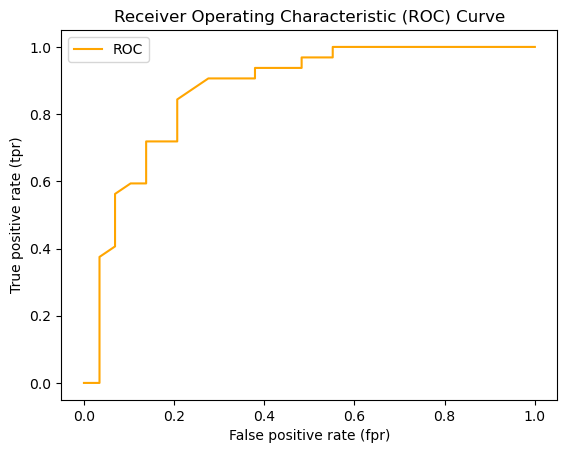

In [117]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [118]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

AUC eğri altındaki alan anlamındadır. 

Eğri altında alınabilecek maksimum puan 1.

Burada maksimum puan 0.869. peki mükemmel bir eğri nasıl olur? Aşağıdaki örneğe odaklan.

Bir roc curve öngördüğü ana ayrıntı, gerçek pozitif oranına karşı yanlış pozitif oranıdır.
Ve bunu özetlemek içinnkullanabileceğimiz ana metrik, sadece bir eğti kullanmak yerine AUC skorunu kullanmaktır.

Bir modelin roc curve'sini hesaplamak gerektiğinde ve bu eğri yanlış pozitif oran ile gerçek pozitif oranı karşılaştıracaksa. 

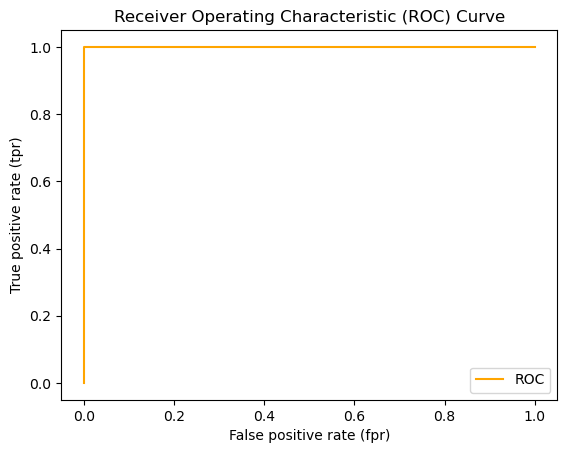

In [119]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [120]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

- ROC eğrileri ve AUC metrikleri, ikili sınıflandırma modelleri için değerlendirme metrikleridir (kalp hastalığı gibi bir şeyi veya başka bir şeyi tahmin eden bir model).

- ROC eğrisi, farklı sınıflandırma eşiklerinde gerçek pozitif oranı (tpr) ile yanlış pozitif oranı (fpr) karşılaştırır.

- AUC metriği, modelinizin sınıflar arasında seçim yapmada ne kadar iyi olduğunu gösterir (örneğin, birinin kalp hastalığı olup olmadığına karar vermede ne kadar iyi olduğu). Mükemmel bir model 1 AUC puanı alacaktır.

Bazı kaynaklar;

https://www.youtube.com/watch?v=4jRBRDbJemM

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=tr

## Confusion matrix

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video.ipynb

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

Bir modelin tahmin ettiği etiketler ile tahmin etmesi gereken gerçek etiketleri karşılaştırmanın hızlı bir yolu. Modelin nerede kafasının karışacağına dair fikir verir.

In [121]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

Aslında tüm modellerde gerçek etiketleri tahminlerle karşılaştırırz ve bize bu karşılaştırma hakkında bilgi verilir.

In [122]:
#Visualize confisuon matrix with pd.crosstab()

pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

#iki farklı şeyi karşılaştırmada kullanılan kod.
#23'ten 26 ya true poz/ true negt.
#6'lar sağ üst false negt. sol alt false pozt.

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


Tahmin edilen değer ile gerçek değerin karşılaştırması yapılır. 

Gerçek etiketin sıfır ve tahmin edilen etiketin sıfır olduğu durumda 22 örnek var.

Tüm rakamların toplamı 61, zaten len(y_preds) = 61

Tabloyu okursak; modelin 1 olarak tahmin ettiği ancak gerçek etiketin 0 olduğu tahmin edilen etiketi elde ettik.

8 --> false negative

* Seaborn, matplotlib üzerinde bir görselleştirme kütüphanesidir.
* Confisuon matrix çapraz sekme dışında görselleştirmenin kolay yolu.

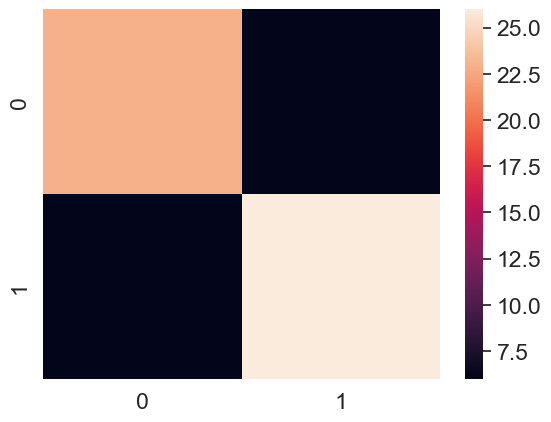

In [123]:
#Make confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Make confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat);

Normalde Seaborn miniconda'da yüklü değildir, etkinleştirmek için;

import sys
!conda install --yes --prefix {sys.prefix} seaborn

bu komutu çalıştırdığında pc'ne erişime izin verir ve ardından Jupyter'e bir bash komutu çalıştırmasını söylemenin bir yolu.

### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.

sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.
Note: Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:

If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

In [124]:
import sklearn
sklearn.__version__

'1.3.0'

In [125]:
clf

RandomForestClassifier()

Daha çok değer var, tüm x ve y değerlerini aktarıyoruz. Tahmin edici, son tahminin bir sınıflandırıcı olduğu boru hattı üzerinde bir örnek, uygun bir sınıflandırıcı veya uygun bir ölçek sınıfı tahmindir. 

Tahmin edici olmadan matrix oluşturulabiliyor.

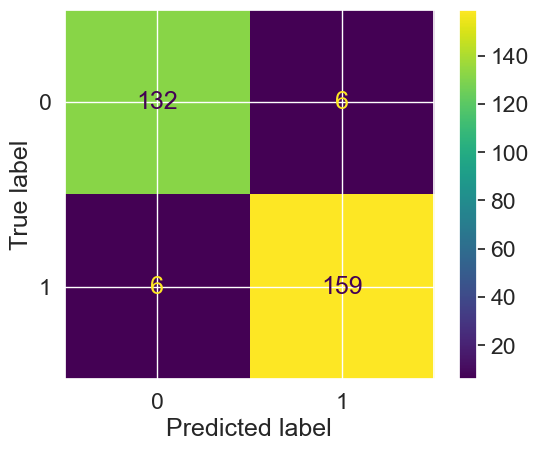

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

Tahminler burada hazır olmalı. 

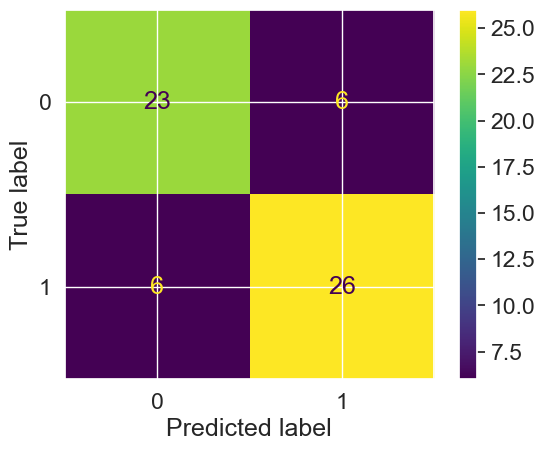

In [127]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

Üçü de aynı verileri gösteriyor.
Neler olduğunu anlamak için yararlı görselleştirme seviyeleri var. 

### Classification Report

In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



unutma!

bu değerlendirme ölçütü sadece verilerin gerçek etiketleri ile modelin yaptığı tahminleri karşılaştırır.

precision (hassasiyet) : pozitif tanımların oranıdır. Yani bir k.a. modelinin birinci sınıfı tahmin ettiğini ve bu tahminlerin aslında doğru olduğunu göstermiştir. Hiç hassasiyet üretmeyen bir modelin hassasiyeti 1'dir.
* Burada yanlış pozitif üretmediyse ki model üretmedi çünkü sınıflandırmaya veya confusion matrix'e baktığımızda bazı örneklerde kafasının karıştığını ve bunları false pozitif olarak tahmin ettiğini gördük. 

recall : Doğru sınıflandırılan gerçek pozitiflerin oranını gösterir. Hiç yanlış negatif üretmeyen bir modelin recall değeri 1.0. 

F1-score : Hassasiyet ve recall'in bir kombinasyonudur. Mükemmel bir modelde f1 1.0'dır. 

support : Her bir metriğin hesaplandığı örnek sayısıdır. Burada 32 kalp hastası var 29 ile topla toplam 61. 

accuracy : Mükemmel modelin 1.0'dır.

macro avg : Sınıflar arasındaki ortalama hassasiyet geri çağırma ve f1 puanlarıdır. Makro ortalama sınıf ve dengeyi hesaba katmaz. Sınıf dengesizliği varsa bu metriğe dikkat. Burada sınıf dengesizliği yok çünkü sıfır ve bir sınıflarında nispeten aynı sayıda örnek var. 

weight avg : Hassasiyet, geri çağırma ve f sınıflar arasında bir puan ağırlıklı, her metriğin her sınıfta kaç örnek olduğuna göre hesaplandığı anlamına gelir .Sınıf lehinedir, Örneğin bir sınıf daha fazla örneğe sahip olduğu için diğerinden daha iyi performans gösterdiğinde yüksek bir değer verilir. Burada macro ve weight aynı çıkmış çünkü dengeli. 

Sadece accuracy yeterli değil, neden?

Aşağıda 10.000 kişi var. Bunların her birinde bir hastalık var ve kimin bu hastalığa sahip olduğunu tahmin et. 

Bir model oluşturuldu ve her bir vakanın sıfır olduğunu öngörür. Sadece bir tahmin kaçırır.

output_dict --> küçük bir parametreyi bir veri çerçevesine sığacak şekilde aktarmak 

Burada çok büyük bir sınıf dengesizliğine sahip olduğunuzda doğruluk dışında başka bir metrik kullanmak isteyeceğimiz bir örnek. Burada 1'e 10.000 sınıf dengesizliği var. 

In [129]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall.

## 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

R^2

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [130]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

(Yukarısı) verileri eğitim ve test seti y olarak ayırmalısın, böylece modeli eğitim verileri üzerinde eğitebilir ve modelin daha önce hiç görmediği test verileri üzerinde değerlendirebilirsin.

RandomForest..topluluk algoritmasının doğası gereği, bir tahminci belirleriz, n_estimator. Böylece rastgele ormandaki mini model sayısı, rastgele ormandaki karar ağacı sayısı varsayılan olarak 100 yaptık.

In [131]:
model.score(X_test, y_test)

0.8059809073051385

Sadece ortalamayı tahmin ettiysen, yani tüm y testi etiketine sahipsen, y testine bakmalısın.

In [132]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [133]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [134]:
y_test.mean()

2.0550030959302323

scikit learn kullanarak modeli değerlendirmenin başka bir yolu:

y_test uzunluğunda tam bir dizi oluşturuldu. Böylece her test ortalamasının değerine sahip olur. 

In [135]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [136]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

Model sadece ortalamayı, yani tüm bu değerleri tahmin ediyorsa R2 skorunun sıfır olması gerekir.

In [137]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [138]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

Bu özelliklerden hedef değeri tahmin etmede ne kadar başarılı olduğunu görmek için regresyon algoritmanızı test edebileceğin hızlı bir yol.

### Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

Tahminler ile gerçek değerler arasındaki mutlak farklın ortalamasıdır.

Modelin tahminlerden ne kadar yanlış olduğu konusunda fikir sahibi olursun.

It gives you an idea of how wrong your models predictions are.

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video.ipynb

In [139]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3270458119670544

Daha önce oluşturduğumuz modelin test veri seti y üzerinde tahmin yapmak için kullanıyoruz. Çünkü makine modelini değerlendirirken veri üzerinde tahmin yapmasını isteriz. Eğitim seti üzerinden de değerlendirme yapılabilir, ancak çoğu zaman daha önce hiç görmediği test verileri üzerinde nasıl performans gösterdiği ile ilgilenmeliyiz.

burada y_test değerlerinin ortalama mutlak hatası modelimizin test özellikleri üzerinde yaptığı tahminlerle karşılaştırırız. 

In [140]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.490580,0.013580
3024,0.45800,0.759890,0.301890
15663,5.00001,4.935016,-0.064994
20484,2.18600,2.558640,0.372640
9814,2.78000,2.334610,-0.445390
13311,1.58700,1.658080,0.071080
7113,1.98200,2.342370,0.360370
7668,1.57500,1.667080,0.092080
18246,3.40000,2.560960,-0.839040
5723,4.46600,4.851978,0.385978


Yukarıda farkları listeledik.

Fark ortalamasını ise aşağıda alıyoruz.
Sütunun ortalması df["differences"].mean()

Ama sonuç hatalıdır, çünkü negatif değerler de var.


abs değeri mutlak değer demektir.

In [141]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3270458119670544

### Mean squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values.

In [142]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2542443610174998

Bir modeli değerlendiren şey, tahminleri temel gerçek değerleriyle karşılaştırmaktır MSE, ortalama karesel hataya eşittir.

In [143]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,0.000184
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [144]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2542443610174998

In [145]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16 
# increase "squared_differences" for 1 sample

In [146]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,0.091138
15663,5.00001,4.935016,-0.064994,0.004224
20484,2.18600,2.558640,0.372640,0.138861
9814,2.78000,2.334610,-0.445390,0.198372


In [147]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25812028533523235

Büyük bir hata yapılmasına rağmen sonuç çok değişmedi.

Amacımız bazı büyük değerleri buraya ekleyerek r2'yi nasıl etkilediğini görmek.

In [148]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.490580,0.013580,16.000000
3024,0.45800,0.759890,0.301890,20.000000
15663,5.00001,4.935016,-0.064994,20.000000
20484,2.18600,2.558640,0.372640,20.000000
9814,2.78000,2.334610,-0.445390,20.000000
...,...,...,...,...
15362,2.63300,2.225000,-0.408000,0.166464
16623,2.66800,1.972540,-0.695460,0.483665
18086,5.00001,4.853989,-0.146021,0.021322
2144,0.72300,0.714910,-0.008090,0.000065


In [149]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7342642968470183

* r2 karesel belirleme katsayımız doğruluğa benzer, modelin ne kadar iyi performans gösterebileceğine dair hızlı gösterge verir. Ancak her tahminin ne kadar uzak olduğu açısından modelin tam olarak ne kadar yanlış olduğunu her zaman söylemez. 1'se şüpheci ol, veri bölmesinden emin ol.

* MAE model tahminlerin her birinin ortalama olarak ne kadar uzakta olduğuna dair daha iyi bir gösterge verir. Yani her tahmin ortalama olarak hedef değerden bu kadar uzaktır. 

* MAE veya MSI karşılaştırmak istediğinizde, tahmin edilen değerler ile gerçek değerler arasındaki farkları kareler. 

# Machine Learning Model Evaluation

### Classification Model Evaluation Metrics/Techniques

* Accuracy : Modelin ondalık biçimdeki doğruluğu. Mükemmel doğruluk 1.0'a eşittir.

* Precision : Gerçekten doğru olan pozitif tanımlamaların (model tahmin edilen sınıf 1) oranını gösterir. Yanlış pozitif üretmeyen bir model 1.0 hassasiyete sahiptir.

* Recall : Doğru sınıflandırılan gerçek pozitiflerin oranını gösterir. Yanlış negatif üretmeyen bir model, 1.0'lık bir geri çağırmaya sahiptir.

* F1 Score : Hassasiyet ve hatırlamanın bir kombinasyonu. Mükemmel bir model, 1.0'lık bir F1 puanı elde eder.

* Confusion matrix : Tahmin edilen değerleri doğru değerlerle tablo şeklinde karşılaştırır, %100 doğruysa matristeki tüm değerler sol üstten sağ alta doğru olacaktır (diyagonal çizgi).

* Cross-validation : Veri kümenizi birden fazla parçaya böler ve modelinizi her parçada eğitir ve test eder, ardından performansı ortalama olarak değerlendirir.

* Classification report : Sklearn, hassasiyet, hatırlama ve f1-score gibi bazı ana sınıflandırma metriklerini döndüren classification_report() adlı yerleşik bir işleve sahiptir.

* ROC Curve : Alıcı çalışma karakteristiği olarak da bilinir, gerçek pozitif orana karşı yanlış pozitif oranın bir grafiğidir.

* Area Under Curve (AUC) Score : ROC eğrisinin altındaki alan. Mükemmel bir model 1.0 AUC puanı alır.

## 4.2.3 Finally using the scoring parameter

Burada modellerin değerlendirmesini yaparız. Tahminleri, tahmin etmesi gerekenlerle karşılaştırırız. 

Çapraz doğrulama : veri setinde birden fazla eğitim ve test setine bölmek ve daha sonra değerlendirmek veya belirli bir eğitim üzerinde tek bir modeli eğitmek ve bu test setinde değerlendirmek ve bunu birkaç kez tekrarlamaktır. Her farklı bölüm için farklı puanlar almalıyız ve daha sonra modelin bu farklı bölümlerde nasıl gittiğini görmek için bunların ortalamasını alabiliriz.

cv = cross validation 

cv = 5 beş farklı alanda değerlendirir. cv none yaparsan default hali 5.

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [151]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 

# if scoring=None, esitmator's default scoring evaulation metric is used 
# (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [152]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is:; {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:; 82.48%


In [153]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [154]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [155]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

0.93 - 0.79'lar var. Verilerin bölünmesine bağlı olarak modelin bir bölümünde diğerinden daha iyi performans gösterir. 

In [156]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [157]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

Değerler birbirine yakın, iyi.

In [158]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


##### The scoring parameter being using for a regression parameter

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [160]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6538469004539024

In [161]:
cv_r2

array([0.61899722, 0.72073286, 0.62181062])

In [162]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42995279896739047

In [163]:
cv_mse

array([-0.52415422, -0.34606945, -0.37337966, -0.44186726, -0.4642934 ])

In [164]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4663111819040699

In [165]:
cv_mae

array([-0.54587517, -0.40931278, -0.4388763 , -0.46484301, -0.47264865])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

normalde accuracy içinde y_true, y_preds var. Gerçek y değerleri ile tahmini y değerleri kıyaslanır.

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [167]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8059809073051385
MAE: 0.3270458119670544
MSE: 0.2542443610174998


cross_val_score, regresyon metrikleri ve sınıflandırma metrikleri arasındaki fark nedir?

Bu metrikler bir eğitim testi bölünmesinde bulunurken, buradaki metrikler cross_val kullanarak birden fazla eğitim seti bölünmesinde bulunur. 

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

# 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

İlerledikçe yapmaya çalışacağın şey, ilk tahminleri yapıp değerlendirdikten ve temel model gibi ilk modeli oluşturduktan sonra bunu geliştirmeye çalışmaktır. 

From a data perspective:

- Could we collect more data? (generally, the more data, the better)
- Could we improve our data?

Örneğin arabanın modeli, rengi - fiyatı içeren bir tablonda daha fazla özellik olsa, her satır ile ilgili daha fazla derinliğe sahip olsan. 

From a model perspective:

- Is there a better model we could use?
- Could we improve the current model?

simple model vs complex model. Sklearn map kontrol ettiğinde ilk aşamadaki modeller basittir, ilerledikçe adalar içinde, daha karmaşıklaşır uzun sürer ama sağlamdır.

Diyelim ki kutudan çıkardığımız model iyi sonuç verirse ki randomforest böyledir, bu modelin hiper parametrelerini daha da iyi hale getirmek için geliştirebilir miyiz? 

ML bulunduğu verilerdeki kalıplarda genellikle veri parametreleri olarak adlandırılır. Parametreler ve hiper parametreler arasındaki fark ise bir makine öğrenimi modelinin verilerdeki örtüntüleri kendi başına bulmaya çalışmasıdır. Yani makine öğrenimi modeli verilerdeki parametreleri kendi başına bulur, oysa hiper parametreler bir model üzerinde ayarlayabileceğiniz ayarlardır. 

Hyperparameters vs. Parameters

- Parameters = model find these patterns(kalıp) in data
- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [168]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

Aşağıdakiler, rastgele orman sınıflandırıcıda ayarlanabilecek hiperparametrelerdir.

random forest classifier -->
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

parametre diye geçer. Python terimleriyle bunların her birinin ayarlamak için bu işlevi iletebileceğimiz bir parametre olmasıdır. 

Örneğin tavuk veri, tarif kalıp ise fırında 180 derece ideal. Deneye deneye 200 derece ideal olduğunu anladın. Bu dereceyi arttırmadaki parametre hiper parametredir.

Aynı şekilde, randomforestclassifier'i olduğu gibi, varsayılan parametreleriyle kutudan çıktığı gibi kullanırsak listelenenler, verilerimizdeki kalıplaro oldukça iyi bulabilir. Ancak yapabileceğimiz şey, bunları fırındaki ayarlara benzer şekilde ayarlamak ve böylece verilerdeki bu kalıpları kutudan çıktığı halden biraz daha iyi bulmasını sağlamak olabilir. 

In [169]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

Model üzerinde ayarlayabileceğimiz ayarlar aşağıdaki gibidir. 

In [170]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators

Bir model eğitim seti üzerinde eğitilir, örüntüleri bulur ve daha sonra test seti üzerinde değerlendirilir. Dolayısıyla bu kalıpları kullanır. Ama hiperparametre ayarı üçüncü bir set, bir doğrulama seti sunar.

Eğitim seti(train), bir üniversite kursunda olduğunuzu ve kurs materyallerini öğrendiğinizi varsaymaya benzer. Doğrulama seti (validation), bilginizi biraz test edeceğiniz ve neleri ayarlamanız gerektiğini göreceğiniz yerdir. 

* course materials = tarining set
* practice exam = validation set
* final exam = test set

Deneme sınavına girersin, bazı soruları yanlış yaparsın. Practice exam'de kendini geliştirirsin ve sonunda final sınavında kendini iyi değerlendirirsin. 

The ability for a ML model to perform well on data it hasn't seen before.

Üzerinde çalıştığın model ne olursa olsun, işlev oluştur. Tekrarlı işlevlerde bu işe yarar.

y gerçek etiketleriyle y tahmin etiketleri üzerinde değerlendirme karşılaştırması yapılır.

Aşağıda farklı değerlendirme fonksiyonlarını hesaplayacak ve ardından bir metrik sözlük döndürür. Böylece bunu daha sonra saklayabiliriz. 
Tahminleri döndürmesi için bir sözlük oluşturuldu. Böylece onları diğer tahminlerle karşılaştırdık.

In [171]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

Aşağısı için;

* frac=1 kalp hastalarını alıp örnekler. Bu rastgeke bir işlemdir ve ardından kalp hastalığını veri çerçevesini normal değişkene yeniden atarız.
* shuffle = karıştırmak
* %70 + %15 + %15 olarak ayrıştırıldı.
* clf = RandomForestClassifier() buraya hiç birşey aktarmadığımız için, bu onu temel parametrelerle örneklendirir. Rastgele oman sınıflandırıcısına hiçbir şey aktarmadan ve rastgele sınıflandırıcının temel parametreleriyle, yani cl.get_params() yazdığında listelenenler ile, örneklenir. Amacımız bu çünkü bazı temel tahminler yapmak isteriz. 
* Doğrulama verileri üzerinde tahmin yapılır çünkü modelin doğrulama bölünmesi üzerinde ayarlamak isteriz. Metriği dayandırdığımız şey, önce değerlendirme fonksiyonunu doğrulama bölünmesinde (valid split) çalıştırarak bir temek metrik oluşturmak, ardından hiper parametreleri ayarlamak ve modeli doğrulama bölümünde tekrar denemek. (valid_split..) ve nasıl karşılaştırıldıklarına bakmaktır. 

* kod çalıştır len() x_train, x_valid, x_test için...

In [172]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[:valid_split]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

Şimdi yapacağımız şey, farklı hiper parametrelerle ikinci bir sınıflandırıcı oluşturmak. Çünkü yukarıda RandomForestClassifier() kutudan çıktığı andaki temel hiper parametrelerle başlattık (sanki hazır tarife bakıp yemeği pişirmek gibi). 

clf_2'de de aynı veriler var ama bu sefer on yerine yüz tahmin edilen değer kullanır. Yukarıdaki beş seçilmişten sadece bir tanesini deniyoruz. Temel tahminler doğrulama kümesi üzerindedir ve şimdi farklı hiper parametrelerle tahminler yapar. 

In [173]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Precision: 0.83
Recall: 0.80
F1 score: 0.82


## 5.2 Hyperparameter tuning with RandomizedSearchCV

Yukarıdaki beş hiper parametre ile bir sözlük oluşturuldu ve karışık bir şekilde bilgiler yazıldı. Ama hesaplama rastgele değil. 

n_jobs = -1 hepsi demek. Son işlere aktardığınız farklı değerler, bilgisayar işlemcinizin ne kadarını bir makine öğrenimi modeline aktarmak istediğin ile ilgili. 

RandomizedSearchCV bir uyum ve skor yönetimi uygular. Ayrıca kullanılan tahminde uyguladıkları takdirde predict, predict_proba, decision_function, transform..uygular.

Yani hiper parametreler üzerinde rastgele arama yapar. 

RandomizedSearchCV sınıflandırıcıyı alır. parametre dağılım ızgarası alır ve bu ızgara üzerinde arama yapar. 10 farklı zamanda bu parametrelerin rastgele kombinasyonları.

x_train ve y_train'i sığdırmak zorunda olmamızın nedeni RandomizedSearchCV'nin çapraz doğrulama anlamına gelmesidir. Doğrulama setlerini bizim için otomatik olarak oluşturur. 

Çıktıda rastgele kombinasyonlar yer alır. 

In [174]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier (örnekleme yapmak)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

In [175]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [176]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

#her zaman iyi sonuçlar bulamazsın.

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## 5.3 Hyperparameter tuning with GridSearchCV

In [177]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

hiper parametreler burada değerlendirilir. Randomsearch ile gridsearch arasındaki fark, random olanda N_iter adında bir parametreye sahip olması. Denenecek model sayısını sınırlamak için ayarlıyorduk. 
Grid olan arama daha sert, mevcut olan her bir kombinasyondan geçer. 

6*5*2*3*3*(en son 5 kere çapraz doğrulama)
ilkinde 6 kalem var.. kombinasyonların sayısı....

Biraz daha sınırlı bir alan oluşturmak lazım, aşağısı bu yüzden. çok iyi bilgisayar olmalı.

Yukarıda uyguladığın clf best params'a göre aşağısını güncelledik. 

3*1*2*1*2*5 = 60

In [178]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

n_iter kaldırdık, diğerinden farklı olarak. Bu her bir kombinasyonu dener ve birinci grid yerine bizim gridi denemesini isteriz 

gridsearchcv yapacağı grid araması, tıpkı random arama gibidir. Ancak tüm bu hiper parametreleri gözden geçirir ve her farklı kombinasyonu deneyerek bunları random forest class'a aktarır. 

ne kadar çok hiper parametre varsa arama o kadar uzun sürer. 

Nazı satırları yoruma çevirdin, modeli yüklemede çakışmaması için...

In [184]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2, 
                      cv=5,
                      verbose=2,
                      refit=True)

# set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

In [185]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [186]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Yine düşük çıktı... Aslında bunu düzeltmenin yolu el ile parametreleri denemek. Doğrulama seti ile bir şeyler bulup bulamayacağına bak ve rastgele arama kullanarak bazı yüksek parametre ayarı dene.

Let's compare our different models metrics.

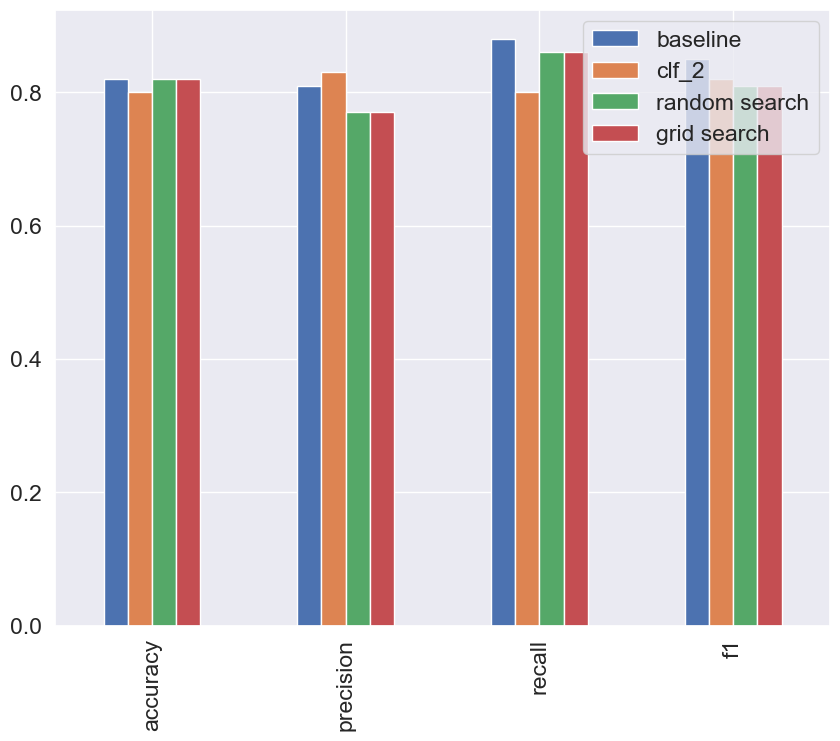

In [187]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

Her zaman olduğu gibi, modelleri karşılaştırırken, aynı veri bölünmelerinde karşılaştırıldıklarından emin olmaya dikkat etmelisiniz.

Örneğin, her biri biraz farklı olan model_1 ve model_2'niz olduğunu varsayalım.

Sonuçlarını karşılaştırmak ve değerlendirmek istiyorsanız, model_1 ve model_2'nin her ikisi de aynı veriler üzerinde eğitilmelidir (örn. X_train ve y_train) ve tahminlerinin her biri aynı veriler üzerinde yapılmalıdır, örneğin:

model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds

model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds

Buradaki farklılıkların iki model ve birbiriyle karşılaştırılabilecek 2 farklı tahmin seti olmasına dikkat edin.

# 6. Saving and loading trained machine learning model

Two ways to save and load machine learning models:

1. With Python's pickle module
2. With the joblib module

#### Pickle

In [188]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

/var/folders/71/9wmqs3m16wn4y3qcjvcr9m440000gn/T/ipykernel_4580/2867820142.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='gs_random_random_forest_model_1.pkl'>
  pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))


In [189]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb")) 

/var/folders/71/9wmqs3m16wn4y3qcjvcr9m440000gn/T/ipykernel_4580/3406830523.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='gs_random_random_forest_model_1.pkl'>
  loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))


In [190]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

#### Joblib

In [191]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [192]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [193]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)


Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

# 7. Putting it all together!

In [194]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [195]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [196]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Pipeline'ın ana girdisi, adım adı ve ger.ekleştirilecek eylemi içeren bir tuple içeren bir liste olan adımlardır.



Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

Aşağıdaki features ile ilgili kodlarda..strategy = mean sayısal sütunlar ortalama ile doldurulur. stratejiye sahip km sayacı, km sayacı sütununun ana değeri alacağı, ve km sayacındaki tüm eksik dsatırları geri kalan değerlerin ortalamasıla dolduracağı anlamına gelir.

Daha spesifik olarak, eksik değerleri atamak ve kategorik değerleri kodlamak (sayılara dönüştürmek) için kullandığımız Pipeline() sınıfına ne olur?
Ana çıkarımlar:
Gerekirse kategorik verilerinizi kodlayın ve sayılara (tüm veri kümesinde) doldurun.
Verilerinizi bölün (eğitim/test olarak), eğitim ve test verilerinizi her zaman ayrı tutun.
Eğitim seti ve test seti üzerindeki sayısal verileri ayrı ayrı doldurun/dönüştürün.
Pipeline()'ı kullanmak tüm bunların sizin için yapılmasını sağlamaya yardımcı olur.

Artık etiketsiz satırları bıraktık ve verimizi X ve y olarak böldük, geri kalan eksik değerleri doldurmak için bir Pipeline() (veya birkaç tanesi) oluşturalım, gerekirse kodlayalım (sayılara dönüştürelim) ) ve onlara bir model uydurun.

Scikit-Learn'deki Pipeline(), verileri doldurma ve ardından modelleme gibi birden fazla adımı sırayla bir araya getirmemize olanak tanıyan bir sınıftır.
Daha spesifik olarak aşağıdaki adımları izleyeceğiz:

* Kategorik, kapı ve sayısal özellikleri tanımlayın.
* Eksik verileri atamak ve verileri kodlamak için transformatör Pipeline()'ları oluşturun.
* Transformatör Pipeline()'larımızı ColumnTransformer() ile birleştirin.
* Verilerimizi ColumnTransformer() ve RandomForestRegressor() ile önceden işlemek ve modellemek için bir Pipeline() oluşturun.
* Train_test_split()'i kullanarak verileri trene bölün ve test edin.
* Ön işleme ve modelleme Pipeline()'ı eğitim verilerine yerleştirin.
* Test verileri üzerinde ön işleme ve modelleme Pipeline()'ı puanlayın.

1. ve 2. adımlarla başlayalım.

Aşağıdakileri oluşturacağız:

* Kategorik değerlerimizi 'eksik' değeriyle dolduracak ve ardından bunları kodlayacak kategorik bir transformatör.
* Kapı sütunundaki eksik değerleri 4 değeriyle dolduracak bir kapı transformatörü.
* Sayısal sütundaki eksik değerleri sütunun geri kalanının ortalamasıyla dolduran sayısal transformatör.

Bunların hepsi Pipeline() sınıfıyla yapılacaktır.

In [197]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSesrchCV with our Pipeline.

GridSearchCV ya da RandomizedSesrchCV kullanım amacı, bir sınıflandırma modeliyle yüksek parametreler aradığımızı gördüğümüz başka bir hiper parametre kümesi bulmaya çalışmaktır.

pipe_grid hiper parametrenin ızgarası olur. Izgara arama özgeçmişi üzerinde arama yapar. Temel farklılık, hper parametre sözlüğünün anahtarını nasıl ayarladığımızla ilgilidir. 

Buradaki imputer, aynı zamanda imputer'a gider bir pipeline olan sayısal transformatör.

processor'a erişmek istiyorsaki num adımı özelliğine, num imputer özniteliğine ve ardından da imputer stretejisine bu şekilde yazmamız gerekli...

Çift çizgi bir üst seviyeye çıkmak içindir. 

In [198]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/muhammedbarut/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [227]:
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [199]:
gs_model.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

0. An end-to-end Scikit-Learn workflow',
1. Getting the data ready',
2. Choose the right estimator/algorithm for our problems',
3. Fit the model/algorithm and use it to make predictions on our data',
4. Evaluating a model',
5. Improve a model',
6. Save and load a trained model',
7. Putting it all together!

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video.ipynb

Sayısal verileri doldururken, eğitim setindeki değerleri doldurmak için test setindeki değerleri kullanmamak önemlidir. Test seti üzerinde tahminde bulunmaya çalıştığımız için bu, geçmişi doldurmak için gelecekten bilgi almaya benzer.

Bir örnek verelim.

Bizim durumumuzda Kilometre Sayacı (KM) sütununda değerler eksik. Sütundaki her değeri (eğitim ve teste ayırmadan önce) ortalama() ile doldurabiliriz. Ancak bu, eğitim setini doldurmak için test setindeki bilgilerin kullanılmasıyla sonuçlanacaktır (çünkü bölünmeden önce sütunun tamamını dolduruyoruz).

Bunun yerine, önce verileri eğitim ve test kümelerine böldük (hala eksik değerlerle). Daha sonra eğitim seti üzerindeki Kilometre Sayacı (KM) sütununun ortalamasını () hesaplayın ve bunu eğitim seti eksik değerlerinin yanı sıra test seti eksik değerlerini doldurmak için kullanın.
Şimdi bu nasıl oluyor diye sorabilirsiniz.

Pipeline() perde arkasında birkaç yöntemi çağırır:

* fit_transform() - bizim durumumuzda bu, Kilometre Sayacı (KM) sütununun ortalamasını () hesaplar ve ardından eğitim verileri üzerindeki sütunun geri kalanını dönüştürür. Ayrıca ortalamayı () bellekte saklar.
* transform() - Kilometre Sayacı (KM) sütununun kayıtlı ortalamasını () kullanır ve test değerlerini dönüştürür.

Bekle bekle bekle. Bu kafa karıştırıcı... Pipeline() eğitim ve test verilerinin ne olduğunu nasıl biliyor? Hiç söylemedik mi?
Haklısın.

Sihir numarası şudur:

* fit_transform() yalnızca Pipeline()'ınızda fit() çağrılırken kullanılır (bizim durumumuzda model.fit(X_train, y_train) kullandığımızda).
* transform() işlevi yalnızca Pipeline()'ınızda skor() veya tahmin() çağrılırken kullanılır (bizim durumumuzda model.score(X_test, y_test).

Bu, eksik sayısal değerlerimiz hesaplandığında ve doldurulduğunda (fit_transform() kullanılarak), bunların yalnızca eğitim verilerinde meydana geldiği anlamına gelir (yalnızca X_train ve y_train'i model.fit()'e ilettiğiniz sürece).

Ve belleğe kaydedildikleri için, model.score(X_test, y_test) ve ardından transform() işlevini çağırdığımızda, test verileri eğitim setindeki bilgilerle önceden işlenir (geleceği denemek ve tahmin etmek için geçmişi kullanır, diğerini değil) çok yuvarlak).

Kategorik değerler ne olacak?

Genellikle birbirlerine bağlı olmadıkları için kategorik değerlerin kümeler ve örnekler arasında doldurulması uygundur.

Tamam, tüm bunları bilerek cross_val_score() kullanarak model hattımızı çapraz doğrulayalım.

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html

https://scikit-learn.org/stable/modules/grid_search.html#composite-estimators-and-parameter-spaces